In [1]:
!pip install wordcloud

In [2]:
from io import IncrementalNewlineDecoder #handle text streams and read data incrementally, especially useful when dealing with large chunks of data or streams
import numpy as np #helps with numerical operations (arrays, matrices)
import pandas as pd #for handling structured data (tables, CSV files)
from os import path #deals with file paths and system operations
from PIL import Image #for image processing (open, modify, save images)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #for creating word clouds from text

import matplotlib.pyplot as plt #used for creating plots and visualizations
%matplotlib inline #plots appear inside the notebook for easy viewing

In [3]:
#Load in the dataframe
df=pd.read_csv("winedata.csv")

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             65499 non-null  int64  
 1   country                65467 non-null  object 
 2   description            65499 non-null  object 
 3   designation            46588 non-null  object 
 4   points                 65499 non-null  int64  
 5   price                  60829 non-null  float64
 6   province               65467 non-null  object 
 7   region_1               54744 non-null  object 
 8   region_2               25170 non-null  object 
 9   taster_name            51856 non-null  object 
 10  taster_twitter_handle  49467 non-null  object 
 11  title                  65499 non-null  object 
 12  variety                65499 non-null  object 
 13  winery                 65499 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 7.0+

In [6]:
df[["country","description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [7]:
country=df.groupby("country")

In [8]:
country.describe().head()

Unnamed: 0                                       \
                            count          mean           std      min   
country                                                                  
Argentina                  1907.0  32106.696906  19094.547103     16.0   
Armenia                       1.0   8170.000000           NaN   8170.0   
Australia                  1177.0  33295.485981  19254.135680     77.0   
Austria                    1635.0  32058.504587  18206.156484     93.0   
Bosnia and Herzegovina        1.0  16467.000000           NaN  16467.0   

                                                            points             \
                            25%      50%      75%      max   count       mean   
country                                                                         
Argentina               15851.0  30951.0  48687.0  65481.0  1907.0  86.681699   
Armenia                  8170.0   8170.0   8170.0   8170.0     1.0  87.000000   
Australia               17090.0  34186.0  49702.0  65495.0  1177.0  88.582838   
Austria                 17026.5  31374.0  47689.0  65447.0  1635.0  89.992661   
Bosnia and Herzegovina  16467.0  16467.0  16467.0  16467.0     1.0  85.000000   

                        ...                price                              \
                        ...   75%    max   count       mean        std   min   
country                 ...                                                    
Argentina               ...  89.0   95.0  1887.0  23.604663  22.196021   4.0   
Armenia                 ...  87.0   87.0     1.0  14.000000        NaN  14.0   
Australia               ...  91.0  100.0  1158.0  35.786701  52.655879   6.0   
Austria                 ...  92.0   97.0  1364.0  30.846774  18.179124   7.0   
Bosnia and Herzegovina  ...  85.0   85.0     1.0  13.000000        NaN  13.0   

                                                   
                          25%   50%    75%    max  
country                                            
Argentina               12.00  16.0  25.00  230.0  
Armenia                 14.00  14.0  14.00   14.0  
Australia               15.00  21.0  39.75  850.0  
Austria                 18.75  25.0  38.00  150.0  
Bosnia and Herzegovina  13.00  13.0  13.00   13.0  

[5 rows x 24 columns]

In [9]:
# Include 'price' and 'Unnamed: 0' in the groupby and calculation, drop non-numeric columns, and calculate the mean
country[['Unnamed: 0','points', 'price']].mean().sort_values(by="points", ascending=False).head()

,Unnamed: 0,points,price
country,,,
England,43295.277778,91.250000,51.636364
India,32525.750000,90.750000,13.500000
Austria,32058.504587,89.992661,30.846774
Germany,32449.804948,89.808754,40.592233
Hungary,34504.163934,89.426230,50.819672


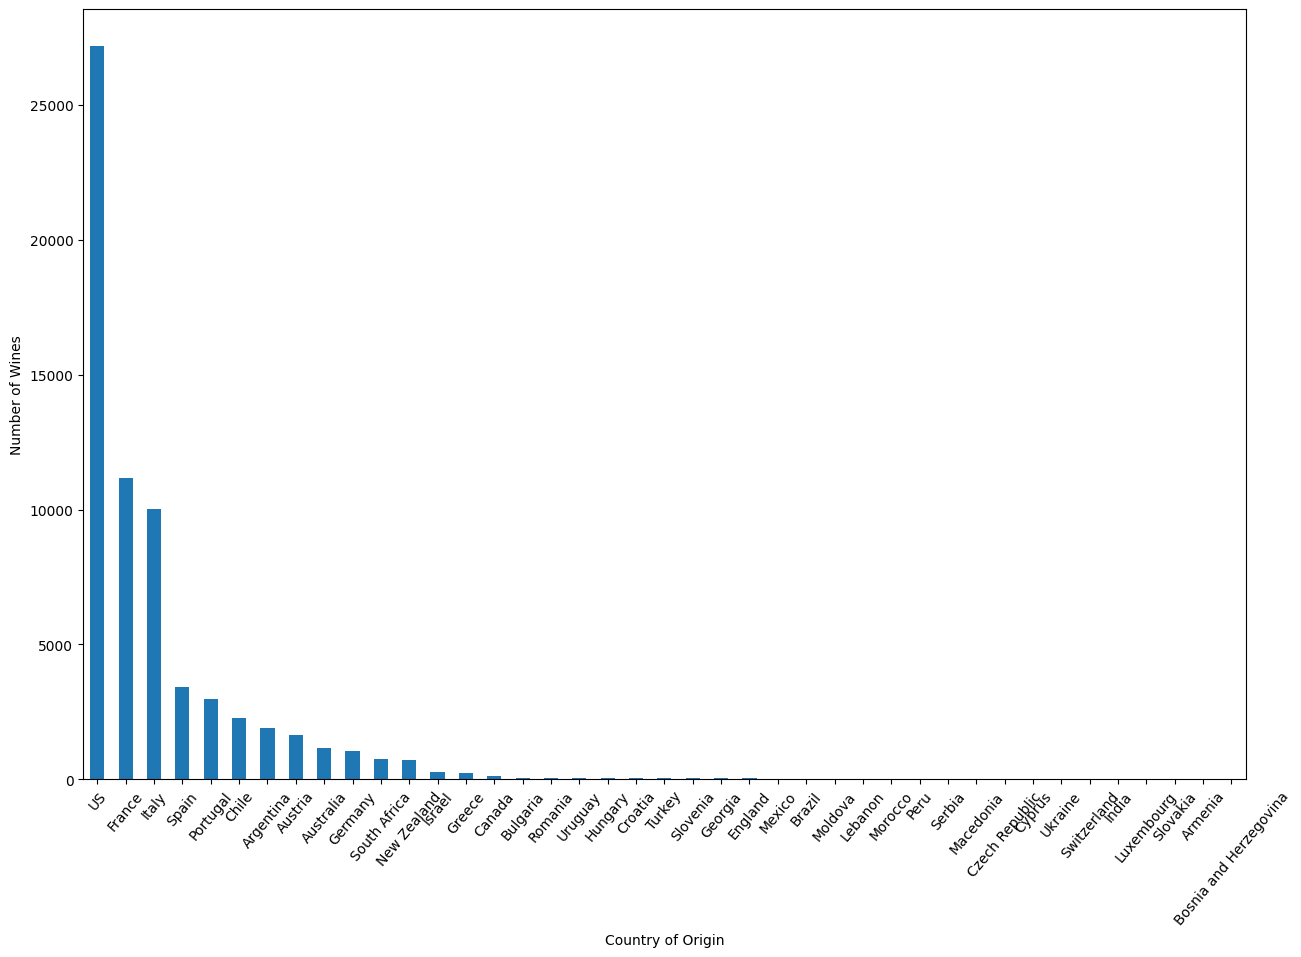

In [10]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

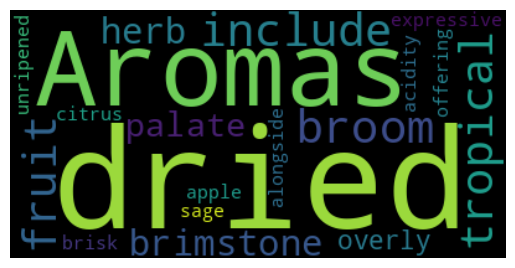

In [11]:
#start with one review:
text=df.description[0]

#create and generate a word cloud image:
wordcloud=WordCloud().generate(text)

#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

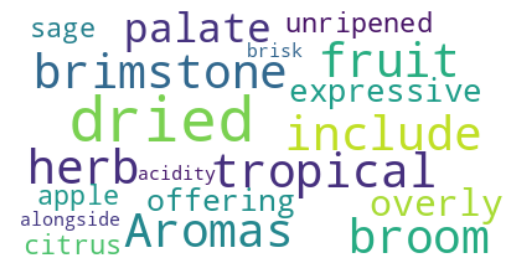

In [12]:
#lower max_font_size, change the maximum number of word and light the background:

wordcloud=WordCloud(max_font_size=50,max_words=100,background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
text=" ".join(review for review in df.description)
print("There are {} words in teh combination of all reviews.". format(len(text)))

There are 15942729 words in teh combination of all reviews.


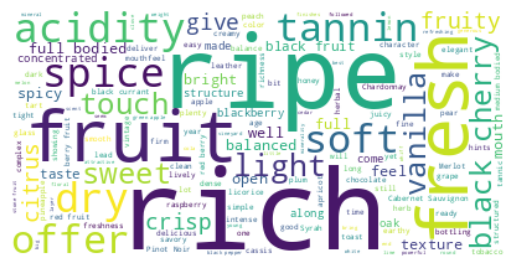

In [21]:
#Create stopword list:
stopwords=set(STOPWORDS)
stopwords.update(["drink","now", "wine", "flavor", "flavors", "include", "finish","palate", "show", "note", "notes","nose","aroma","shows","blend","aromas","hint"])

#Generate a word cloud image
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)

#Display the generated image:
#the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
winebottle=np.array(Image.open("winebottle.png"))
winebottle

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [16]:
def transform_format(val): #Transforms pixel values to 255 if all channels are 0, otherwise keeps the original value.
  if val==0:  # Check if all elements in val are 0, works for grayscale images.
    return 255
  else:
    return val

In [23]:
# Transform your mask into a new one that will work with the function:
transformed_winebottle = np.ndarray((winebottle.shape[0], winebottle.shape[1]), np.int32)

# Iterate through the image and apply the transformation
for i in range(winebottle.shape[0]):
    for j in range(winebottle.shape[1]):
        transformed_winebottle[i, j] = transform_format(winebottle[i, j, 0])  #Assuming winebottle is RGBA, using Red Channel.

In [24]:
#Check the expected result of your mask
transformed_winebottle

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

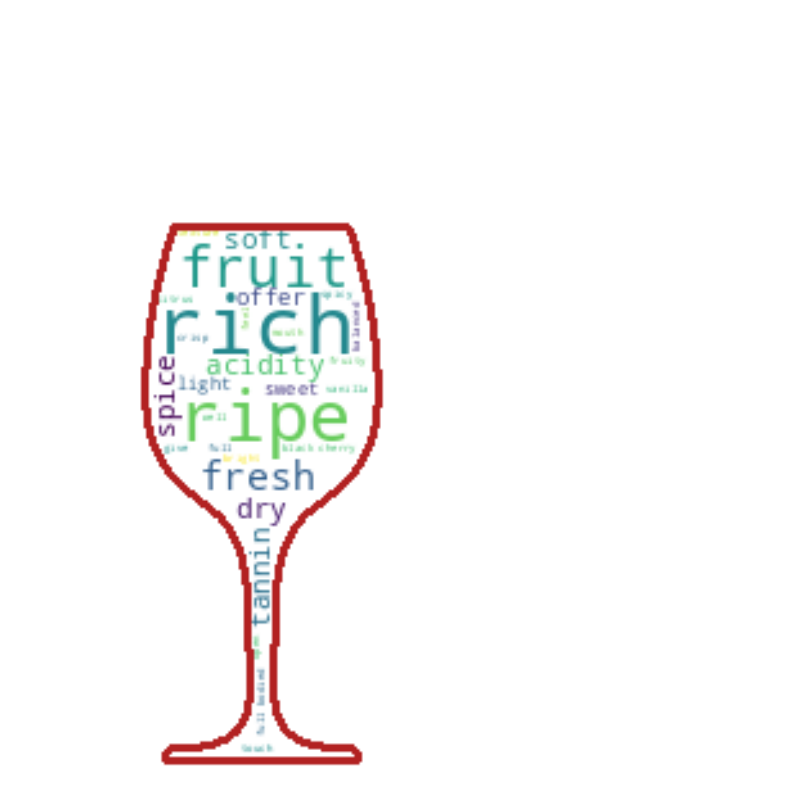

In [25]:
#Create a word cloud image
wc=WordCloud(background_color="white", max_words=1000, mask=transformed_winebottle,stopwords=stopwords,contour_width=3,contour_color='firebrick')

#Generate a wordcloud
wc.generate(text)

#store to file
wc.to_file("wine.png")

#show
plt.figure(figsize=[20,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()
